## Libraries

In [4]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

## Read Data

In [5]:
filename = "C://Users//HP//Documents//Downloads//Energy-Demand-Forecasting-master//Energy-Demand-Forecasting-master//data//data.csv"

In [6]:
df = pd.read_csv(filename)

In [7]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [8]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [9]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_13460\1436439848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])


,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [10]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [11]:
df['consumption'] = df['consumption'] + 1

In [12]:
min(df.consumption)

1

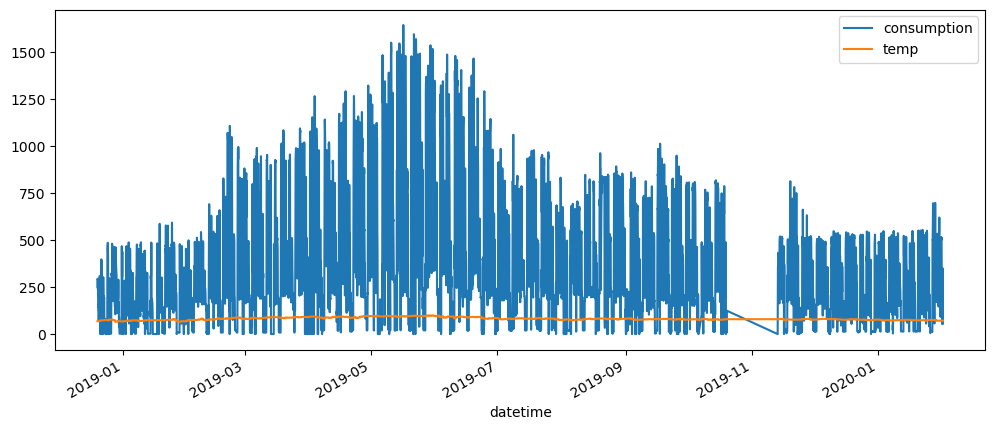

In [13]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [14]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


In [15]:
df = df.reset_index()

In [16]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [17]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [18]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [19]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


In [20]:
df.y = np.log(df.y)

## Model Fitting

In [21]:
model = Prophet()
model.add_country_holidays(country_name='IN')

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\holidays\countries\india.py:101: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


In [22]:
model.fit(df)

23:05:36 - cmdstanpy - INFO - Chain [1] start processing
23:05:44 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
model.train_holiday_names

0        Makar Sankranti / Pongal
1                    Republic Day
2                Independence Day
3                  Gandhi Jayanti
4                      Labour Day
5                          Diwali
6                            Holi
7     Day of Ashura* (*estimated)
8            Mawlid* (*estimated)
9       Eid ul-Fitr* (*estimated)
10      Eid al-Adha* (*estimated)
11                    Palm Sunday
12                    Good Friday
13                  Easter Sunday
14             Feast of Pentecost
15                  Christmas Day
dtype: object

## Predictions

In [24]:
prediction=model.predict(df)

In [25]:
org_prediction = prediction.copy()

In [26]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3956,2019-06-04 10:00:02,5.759735,5.864777,8.988773,5.759735,5.759735,0.0,0.0,0.0,0.0,...,0.207746,0.207746,0.207746,0.825794,0.825794,0.825794,0.0,0.0,0.0,7.461994
3957,2019-06-04 11:00:03,5.759539,5.892204,8.965193,5.759539,5.759539,0.0,0.0,0.0,0.0,...,0.207746,0.207746,0.207746,0.795769,0.795769,0.795769,0.0,0.0,0.0,7.459526
3958,2019-06-04 12:00:02,5.759342,5.717517,8.903050,5.759342,5.759342,0.0,0.0,0.0,0.0,...,0.207746,0.207746,0.207746,0.762181,0.762181,0.762181,0.0,0.0,0.0,7.328471
3788,2019-05-28 10:00:02,5.792694,5.720444,8.960894,5.792694,5.792694,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.825794,0.825794,0.825794,0.0,0.0,0.0,7.287207
3789,2019-05-28 11:00:01,5.792498,5.632117,8.762385,5.792498,5.792498,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.795786,0.795786,0.795786,0.0,0.0,0.0,7.284791
3620,2019-05-21 10:00:02,5.785400,5.656206,8.875192,5.785400,5.785400,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.825794,0.825794,0.825794,0.0,0.0,0.0,7.279913
3621,2019-05-21 11:00:02,5.785491,5.668399,8.859857,5.785491,5.785491,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.795777,0.795777,0.795777,0.0,0.0,0.0,7.277758
3452,2019-05-14 10:00:02,5.766591,5.671462,8.798239,5.766591,5.766591,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.825794,0.825794,0.825794,0.0,0.0,0.0,7.261104
3453,2019-05-14 11:00:02,5.766864,5.709233,8.781872,5.766864,5.766864,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.795777,0.795777,0.795777,0.0,0.0,0.0,7.259131
3961,2019-06-04 15:00:02,5.758754,5.788337,8.725899,5.758754,5.758754,0.0,0.0,0.0,0.0,...,0.207746,0.207746,0.207746,0.646549,0.646549,0.646549,0.0,0.0,0.0,7.249585


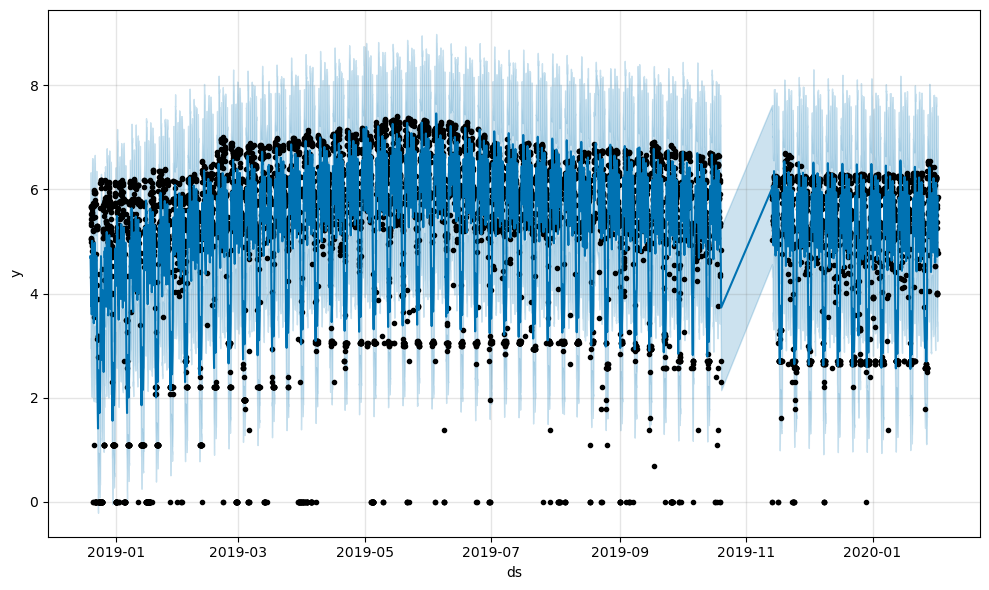

In [27]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

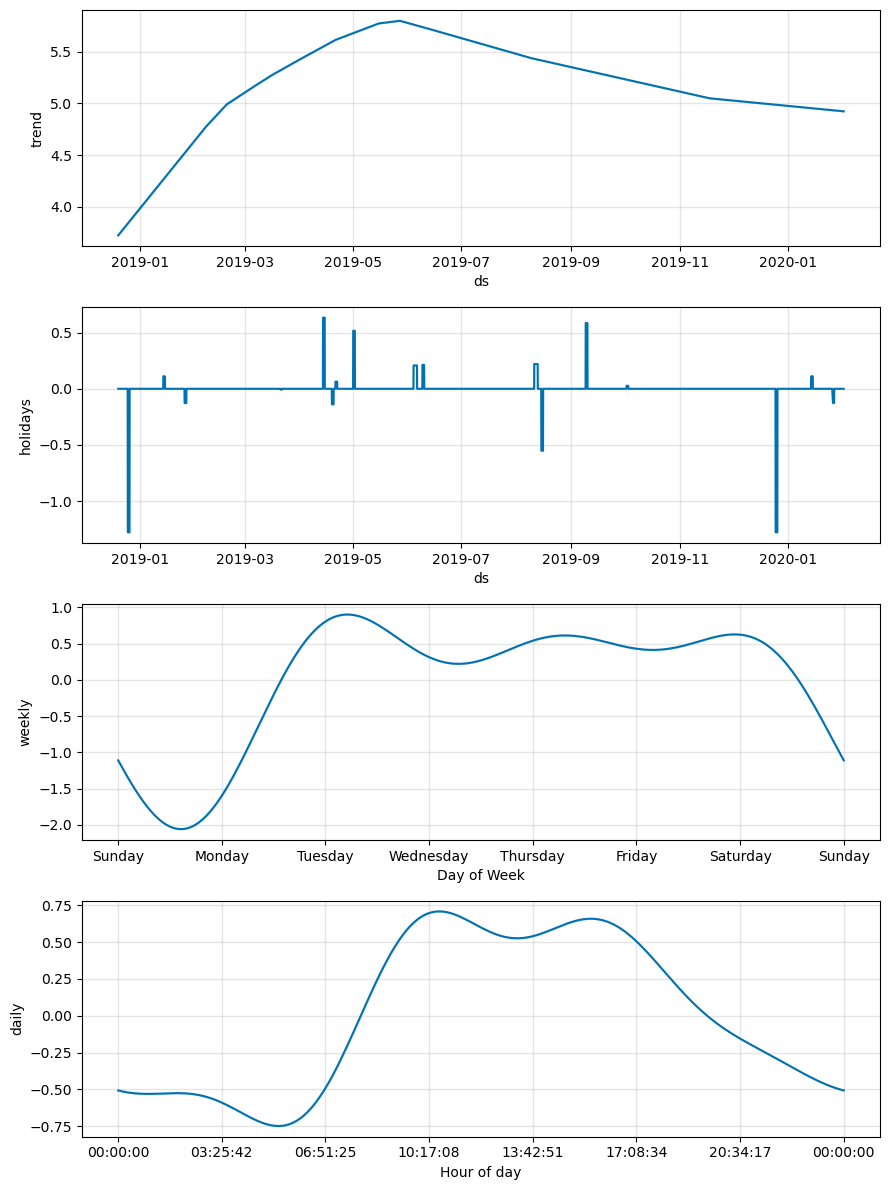

In [28]:
fig = model.plot_components(prediction)

In [29]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [30]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.724323,2.959974,6.253149,3.724323,3.724323,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.329293,0.329293,0.329293,0.0,0.0,0.0,4.690151
1,2018-12-19 16:00:03,3.725209,3.142008,6.330814,3.725209,3.725209,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.352794,0.352794,0.352794,0.0,0.0,0.0,4.727853
2,2018-12-19 18:00:02,3.726981,2.847224,6.047968,3.726981,3.726981,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.402063,0.402063,0.402063,0.0,0.0,0.0,4.444361
3,2018-12-19 19:00:02,3.727867,2.609115,5.886728,3.727867,3.727867,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.427011,0.427011,0.427011,0.0,0.0,0.0,4.245244
4,2018-12-19 20:00:02,3.728753,2.559574,5.647421,3.728753,3.728753,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.451624,0.451624,0.451624,0.0,0.0,0.0,4.099174


## Errors

In [31]:
true_val = np.exp(df.y)

In [32]:
pred_val = np.exp(org_prediction['yhat'])

In [33]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

41348.93154129079

In [34]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

138.38156339566166

## Prediction

In [35]:
data = ['2019-02-25 15:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [36]:
test.ds

0    2019-02-25 15:00:00
Name: ds, dtype: object

In [37]:
val = model.predict(test)

In [38]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-25 15:00:00,5.067576,4.321836,7.335603,5.067576,5.067576,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.134783,0.134783,0.134783,0.0,0.0,0.0,5.838859


In [39]:
np.exp(val['yhat'])

0    343.38744
Name: yhat, dtype: float64

## Saving Model

In [40]:
type(model)

prophet.forecaster.Prophet

In [41]:
pkl_path = "model.pkl"

In [42]:
model.stan_backend.logger = None

In [43]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [44]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)